In [1]:
import numpy as np
import datetime as dt
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import sys
sys.path.append('D:\\gitCCA\\CESdesign\\py')
import CESfunctions_dev as cf


In [3]:
bg1=np.loadtxt("D:\\CCA\\Avantes\\BBCEAS_Data\\20220303\\Ib2203031325.txt")
samples = np.load('D:\\CCA\\Avantes\\BBCEAS_Data\\20220303\\Isamples2203031545.npy')
refe1=np.load("NO2ref_AvSC_corr.npy")
refe2=np.load("CHOCHO_AvSC_corr.npy")
lower_wavelength,upper_wavelength,distance,Reff=(445,459,.99945,70)


minwave,maxwave=cf.segment_indices(samples,lower_wavelength,upper_wavelength)
lines=np.copy(samples[minwave:maxwave,:])
bckg=np.copy(bg1[minwave:maxwave,:])
ref1=np.copy(refe1[minwave:maxwave,:])
ref2=np.copy(refe2[minwave:maxwave,:])

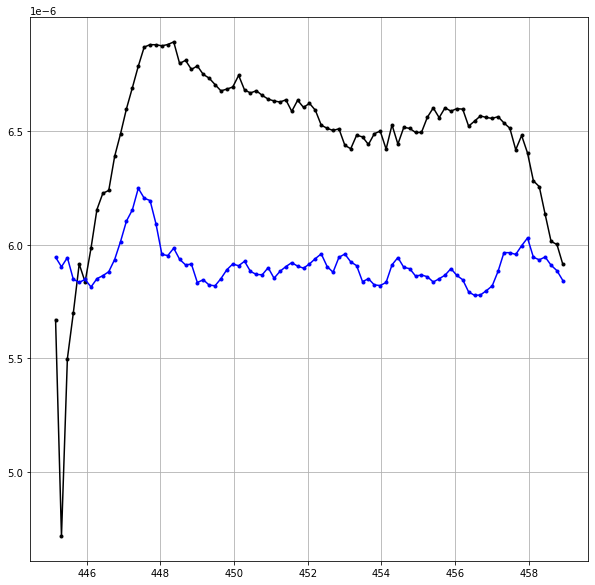

In [16]:
alpha = cf.extinction(lines[:,41], np.average(bckg[:,1:],axis=1), 0.99955, 70)

f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(111)
ax1.plot(lines[:,0],alpha,'.-k')
ax1.plot(lines[:,0],ref1[:,1]*2.5e10*36.3+5.5e-6,'.-b')

plt.grid()

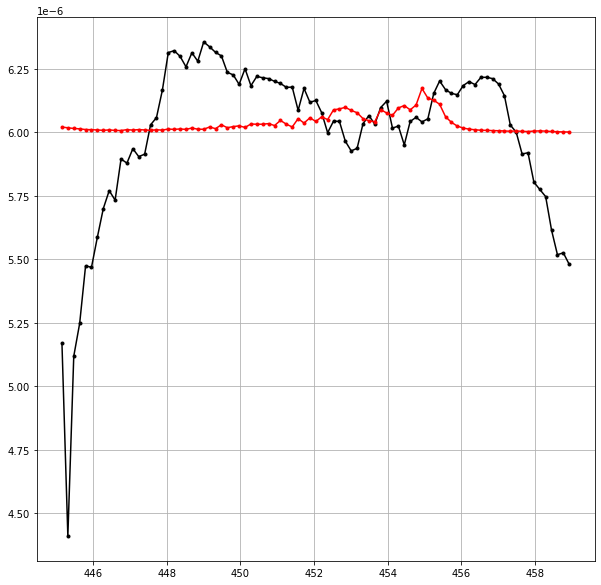

In [13]:
alpha = cf.extinction(lines[:,35], np.average(bckg[:,1:],axis=1), 0.99955, 70)

f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(111)
ax1.plot(lines[:,0],alpha-ref1[:,1]*2.5e10*36.3,'.-k')
ax1.plot(lines[:,0],ref2[:,1]*2.5e10*10+6e-6,'.-r')
plt.grid()

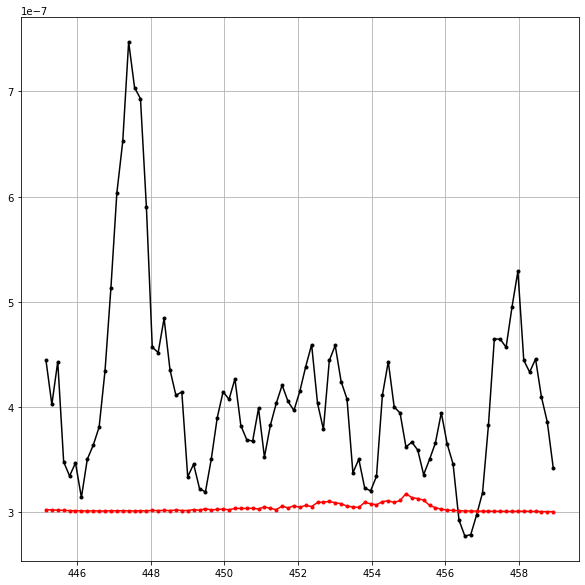

In [19]:
alpha = cf.extinction(lines[:,35], np.average(bckg[:,1:],axis=1), 0.99955, 70)

f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(111)
ax1.plot(lines[:,0],ref1[:,1]*2.5e10*36.3,'.-k')
ax1.plot(lines[:,0],ref2[:,1]*2.5e10*1+.3e-6,'.-r')
plt.grid()